In [1]:
import pandas
import datetime
import matplotlib
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
# read the data from polar DF
polarDF = pandas.read_feather("../data/polar_data.feather")
polarDF.head()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:43: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
/usr/local/lib/python2.7/dist-

,date,mlat,mlt,glat,glon
0,1996-03-30 04:11:57,68.7,359.3,58.6,287.9
1,1996-03-30 05:18:48,68.5,353.9,57.6,274.4
2,1996-03-30 06:52:02,69.5,336.0,61.5,249.1
3,1996-03-30 22:42:05,65.9,353.4,67.0,355.1
4,1996-03-31 00:25:54,66.5,346.9,62.4,321.4


In [3]:
# read data from IMAGE FUV dataset
imageDF = pandas.read_feather("../data/image_data.feather")
imageDF.head()

,date,glat,glon,mlat,mlon,mlt
0,2000-05-16 17:47:17,69.04,84.96,63.97,158.94,23.76
1,2000-05-18 09:55:40,67.46,191.68,64.23,245.74,21.51
2,2000-05-19 13:40:22,71.79,166.96,66.53,225.19,23.66
3,2000-05-20 02:49:06,59.07,294.52,68.02,17.79,23.31
4,2000-05-20 04:43:06,56.13,269.26,66.66,337.70,22.51


In [4]:
# Calculate the time diff between two consecutive SS
# onsets in each of the DFs
polarDelTime = polarDF["date"].diff()
imageDelTime = imageDF["date"].diff()

In [5]:
xx = polarDelTime[1]
print xx.seconds/3600., xx.total_seconds()/3600.

1.11416666667 1.11416666667


In [6]:
# convert the difference to hours
polarDelTime = polarDelTime.apply(\
                lambda x: x.total_seconds()/3600. )
imageDelTime = imageDelTime.apply(\
                lambda x: x.total_seconds()/3600. )

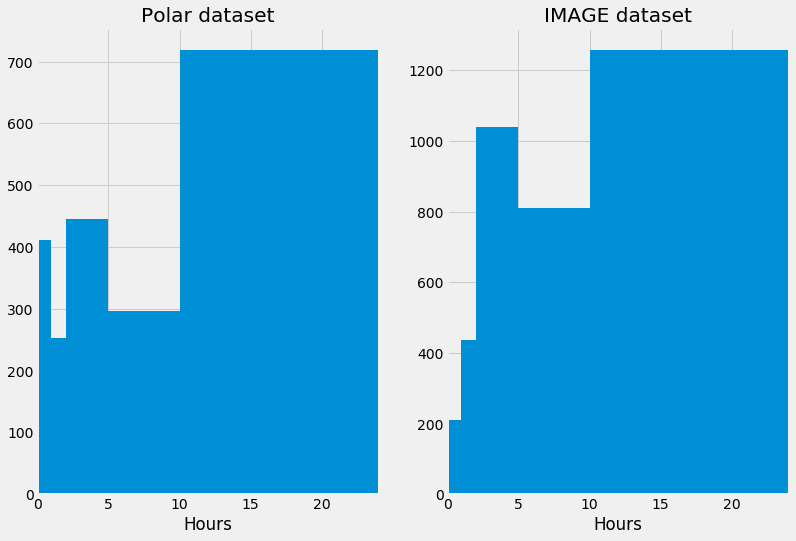

In [7]:
plt.style.use("fivethirtyeight")
f = plt.figure(figsize=(12, 8))

ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)

ax1.hist(polarDelTime.values[1:], bins=[0,1,2,5,10,24])
ax2.hist(imageDelTime.values[1:], bins=[0,1,2,5,10,24])

ax1.set_xlim(0,24)
ax1.set_title("Polar dataset")
ax1.set_xlabel("Hours")

ax2.set_xlim(0,24)
ax2.set_title("IMAGE dataset")
ax2.set_xlabel("Hours")

f.savefig( "../plots/delT-hist.pdf",bbox_inches='tight' )

In [8]:
    polarDF["delT"] = polarDelTime
    imageDF["delT"] = imageDelTime

In [9]:
polarDF.head()

,date,mlat,mlt,glat,glon,delT
0,1996-03-30 04:11:57,68.7,359.3,58.6,287.9,NaN
1,1996-03-30 05:18:48,68.5,353.9,57.6,274.4,1.114167
2,1996-03-30 06:52:02,69.5,336.0,61.5,249.1,1.553889
3,1996-03-30 22:42:05,65.9,353.4,67.0,355.1,15.834167
4,1996-03-31 00:25:54,66.5,346.9,62.4,321.4,1.730278


In [10]:
imageDF.head()

,date,glat,glon,mlat,mlon,mlt,delT
0,2000-05-16 17:47:17,69.04,84.96,63.97,158.94,23.76,NaN
1,2000-05-18 09:55:40,67.46,191.68,64.23,245.74,21.51,40.139722
2,2000-05-19 13:40:22,71.79,166.96,66.53,225.19,23.66,27.745000
3,2000-05-20 02:49:06,59.07,294.52,68.02,17.79,23.31,13.145556
4,2000-05-20 04:43:06,56.13,269.26,66.66,337.70,22.51,1.900000


In [11]:
dateList = []
for row in polarDF.iterrows():
    if row[1]["delT"] <= 2:
        currIndex = row[0]
        # get start time
        startTime = datetime.datetime( polarDF.iloc[currIndex-1]["date"].year,\
                                     polarDF.iloc[currIndex-1]["date"].month,\
                                     polarDF.iloc[currIndex-1]["date"].day,\
                                     polarDF.iloc[currIndex-1]["date"].hour,\
                                     polarDF.iloc[currIndex-1]["date"].minute)
        # get end time
        endTime = datetime.datetime( row[1]["date"].year,\
                                     row[1]["date"].month,\
                                     row[1]["date"].day,\
                                     row[1]["date"].hour,\
                                     row[1]["date"].minute)
        iterTime = startTime
        while iterTime <= endTime:
            dateList.append(iterTime)
            iterTime += datetime.timedelta(seconds=1*60)
# there will be some repeat values, discard them
dateList = sorted(list(set(dateList)))

In [13]:
polarDF.head()

,date,mlat,mlt,glat,glon,delT
0,1996-03-30 04:11:57,68.7,359.3,58.6,287.9,NaN
1,1996-03-30 05:18:48,68.5,353.9,57.6,274.4,1.114167
2,1996-03-30 06:52:02,69.5,336.0,61.5,249.1,1.553889
3,1996-03-30 22:42:05,65.9,353.4,67.0,355.1,15.834167
4,1996-03-31 00:25:54,66.5,346.9,62.4,321.4,1.730278


In [15]:
polarDF = polarDF.set_index(polarDF["date"])

In [16]:
polarDF.head()

,date,mlat,mlt,glat,glon,delT
date,,,,,,
1996-03-30 04:11:57,1996-03-30 04:11:57,68.7,359.3,58.6,287.9,NaN
1996-03-30 05:18:48,1996-03-30 05:18:48,68.5,353.9,57.6,274.4,1.114167
1996-03-30 06:52:02,1996-03-30 06:52:02,69.5,336.0,61.5,249.1,1.553889
1996-03-30 22:42:05,1996-03-30 22:42:05,65.9,353.4,67.0,355.1,15.834167
1996-03-31 00:25:54,1996-03-31 00:25:54,66.5,346.9,62.4,321.4,1.730278


In [29]:
xx = dateList[0]
sTime = xx.strftime("%Y-%m-%d %H:%M:%S")
eTime = (xx+datetime.timedelta(minutes=90)).strftime("%Y-%m-%d %H:%M:%S")
print sTime, eTime
xList = polarDF.loc[ sTime : eTime ].index.tolist()

1996-03-30 04:11:00 1996-03-30 05:41:00


In [36]:
delTList = sorted([ (aa - xx).total_seconds()/60. for aa in xList ])
print delTList

[0.95, 67.8]


In [51]:
for s in delTList:
    for _i in range(3):
        print s, s/30, (_i*30) + 1, (_i+1)*30

0.95 0.0316666666667 1 30
0.95 0.0316666666667 31 60
0.95 0.0316666666667 61 90
67.8 2.26 1 30
67.8 2.26 31 60
67.8 2.26 61 90
